In [90]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cleaners import GSMArena_Dataset_Cleaner

In [91]:
gsmarena_data = pd.read_csv('C:/Users/alber\Documents/My Personal Projects/Smartphone Project/Files/GSMArena.csv')

cleaner = GSMArena_Dataset_Cleaner(gsmarena_data)

cleaned_gsm_arena_data = cleaner.clean()

c:\Users\alber\Documents\My Personal Projects\Smartphone-Project\cleaners.py:116: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\alber\Documents\My Personal Projects\Smartphone-Project\cleaners.py:142: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\alber\Documents\My Personal Projects\Smartphone-Project\cleaners.py:170: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\alber\Documents\My Personal Projects\Smartphone-Project\cleaners.py:171: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\alber\Documents\My Personal Projects\Smartphone-Project\cleaners.py:172: FutureWarning:

The default value of regex will change from True to False in a future version.



In [92]:
cleaned_gsm_arena_data.head()

,Brand,Model,Highest_Network_Technology,Announced,Released,Status,Length,Width,Thickness,Weight,Front,Back,Frame,Number_of_SIMs,Type_of_SIM,Display_Type,Display_Brightness,Display_HDR_Capability,Display_Size_(inches),Screen_To_Body_Ratio_(%),Display_Aspect_Ratio,Pixel_Density,Display_Protection,Mobile_OS,Mobile_OS_Version,Chipset_Maker,Fabrication_Process,Number_of_CPU_Cores,CPU_Performance_Core_Frequency,CPU_Efficiency_Core_Frequency,SD Card Slot,ROM,RAM,Number_of_Rear_Cameras,Storage_Type_Version,Storage_Type,Highest_Camera_Resolution,HDR,Rear_Video_Resolution,Rear_Video_Framerate,Number_of_Selfie_Cameras,Selfie_Video_Resolution,Selfie_Video_Framerate,Headphone_Jack,WI-FI,Bluetooth,NFC,Radio,USB_Connector,USB_Version,Biometric_Sensor,Biometric_Sensor_Type,Biometric_Sensor_Technology,Biometric_Sensor_Location,UWB,Removable,Battery_Type,Battery_Capacity,Colors,Charging_Speed,Wireless_Charging,Reverse_Charging,Loudspeaker_Voice,Loudspeaker_Noise,Loudspeaker_Ring,Battery_Life,IP_Rating,Price
0,ZTE,nubia X 5G,5G,Not Announced Yet,Not Released Yet,Cancelled,Not Measured,Not Measured,Not Measured,Not Measured,Glass,glass,aluminum,2,Unspecified,LCD,Not Specified,No HDR,6.26,Not Measured,19:9,403,Corning Gorilla Glass 3,Android,Android 9.0 (Pie),Qualcomm,7,8,2.84,1.78,No,512,6,2.0,unspecified,unspecified,24,HDR,4K,30,2,4K,30,No,Yes,5.1,No,No,Type-C,unspecified,Yes,Fingerprint,No,Side-mounted,No,No,Li-Po,3800,5,18,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
1,ZTE,Blade V20,LTE,Not Announced Yet,Not Released Yet,Cancelled,Not Measured,Not Measured,Not Measured,Not Measured,,,,2,Unspecified,LCD,Not Specified,No HDR,6.1,Not Measured,19.5:9,282,no special protection,Android,"Android 9.0 (Pie), MiFavor 9.0",unspecified,0,8,2.0,2.0,microSDXC,64,4,3.0,unspecified,unspecified,16,HDR,1080p,30,1,unspecified,unspecified,Yes,Yes,4.2,No,Yes,Type-C,unspecified,Yes,Fingerprint,No,Rear-mounted,No,No,Li-Po,5000,2,18,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
2,ZTE,Coral200 Sollar,GSM,2007-05,2007-01,Discontinued,106.0,45.6,18.1,85.0,,,,1,Mini-SIM,CSTN,Not Specified,No HDR,Not Measured,Not Measured,1:1,Not Measured,no special protection,unspecified,unspecified,unspecified,0,Unspecified,unspecified,unspecified,No,0.004,unspecified,0.0,unspecified,unspecified,no camera,no HDR,no video,no video,0,unspecified,unspecified,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Li-Ion,690,1,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
3,ZTE,F100,UMTS,2009-01,2009-01,Discontinued,105.0,46.0,12.6,90.0,,,,1,Mini-SIM,TFT,Not Specified,No HDR,2.0,26.1,Not Measured,141,no special protection,unspecified,unspecified,unspecified,0,Unspecified,unspecified,unspecified,microSDHC,unspecified,unspecified,1.0,unspecified,unspecified,2,no HDR,unspecified,unspecified,0,unspecified,unspecified,No,No,2.1,No,Yes,unspecified,2.0,No,No,No,No,No,Yes,Li-Ion,1000,3,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
4,ZTE,F101,UMTS,2009-01,2009-01,Discontinued,105.0,46.0,12.6,90.0,,,,1,Mini-SIM,TFT,Not Specified,No HDR,2.0,26.1,Not Measured,141,no special protection,unspecified,unspecified,unspecified,0,Unspecified,unspecified,unspecified,microSDHC,unspecified,unspecified,1.0,unspecified,unspecified,2,no HDR,unspecified,unspecified,0,unspecified,unspecified,No,No,2.1,No,Yes,unspecified,2.0,No,No,No,No,No,Yes,Li-Ion,1000,3,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified


In [93]:
cleaned_gsm_arena_data.shape


(11936, 68)

***** Brands *****

In [94]:
cleaned_gsm_arena_data['Brand'].unique().size

119

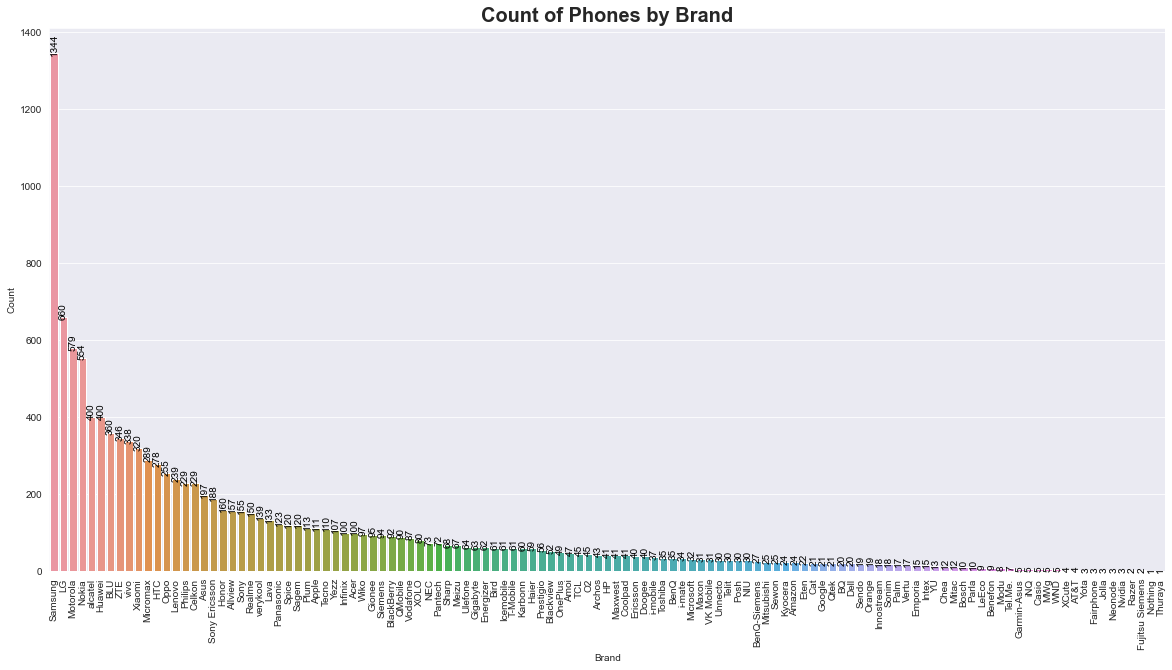

In [95]:
sns.set_style('darkgrid')

# Count the number of occurrences for each value in the 'Brand' column
brand_counts = cleaned_gsm_arena_data['Brand'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=brand_counts.index, y=brand_counts.values)

# Add actual values on top of each bar
for i, v in enumerate(brand_counts.values):
    plt.text(i, v, str(v), fontsize=10, color='black', ha='center', rotation=90)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count of Phones by Brand', fontsize=20, weight='bold')

# Show the plot
plt.show()


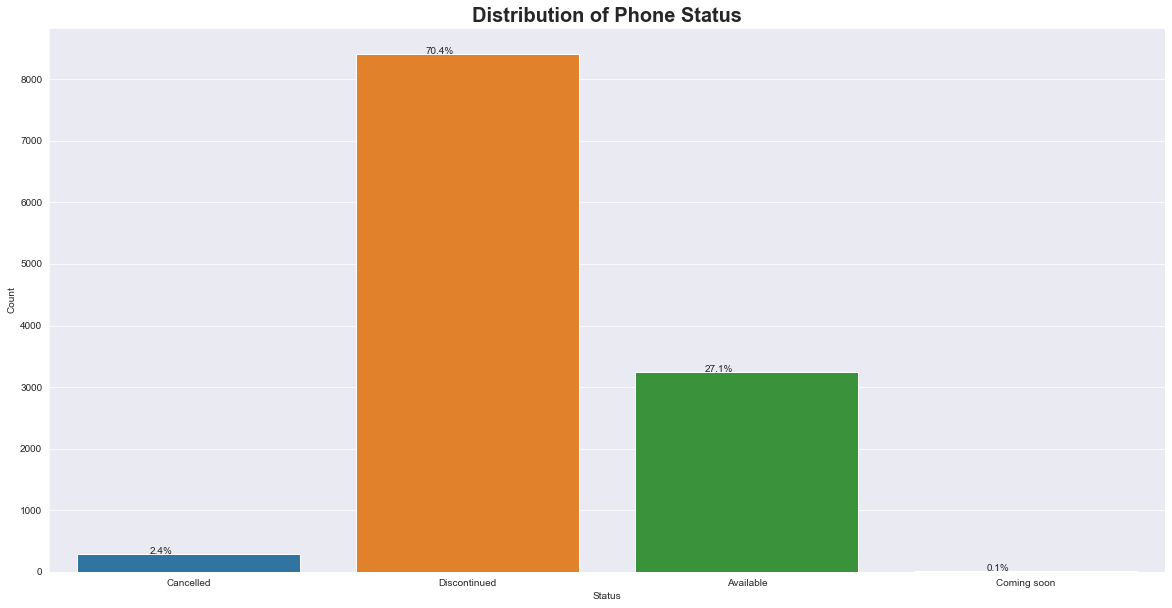

In [96]:
# Create a countplot using seaborn
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Status', data=cleaned_gsm_arena_data)

# Add labels to the plot
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Phone Status', fontsize=20, weight='bold')

# Add percentages to the plot
total = float(len(cleaned_gsm_arena_data['Status']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center', fontsize=10)

# Show the plot
plt.show()

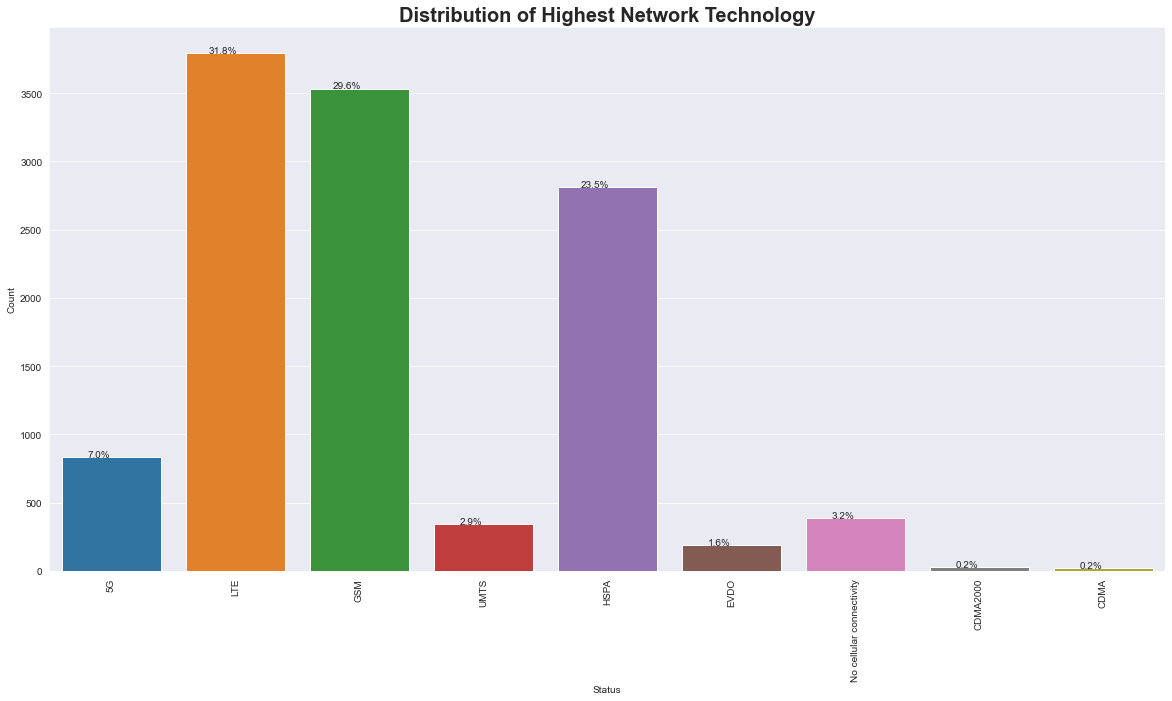

In [97]:
# Create a countplot using seaborn
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Highest_Network_Technology', data=cleaned_gsm_arena_data)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Highest Network Technology', fontsize=20, weight='bold')

# Add percentages to the plot
total = float(len(cleaned_gsm_arena_data['Highest_Network_Technology']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center', fontsize=10)

# Show the plot
plt.show()

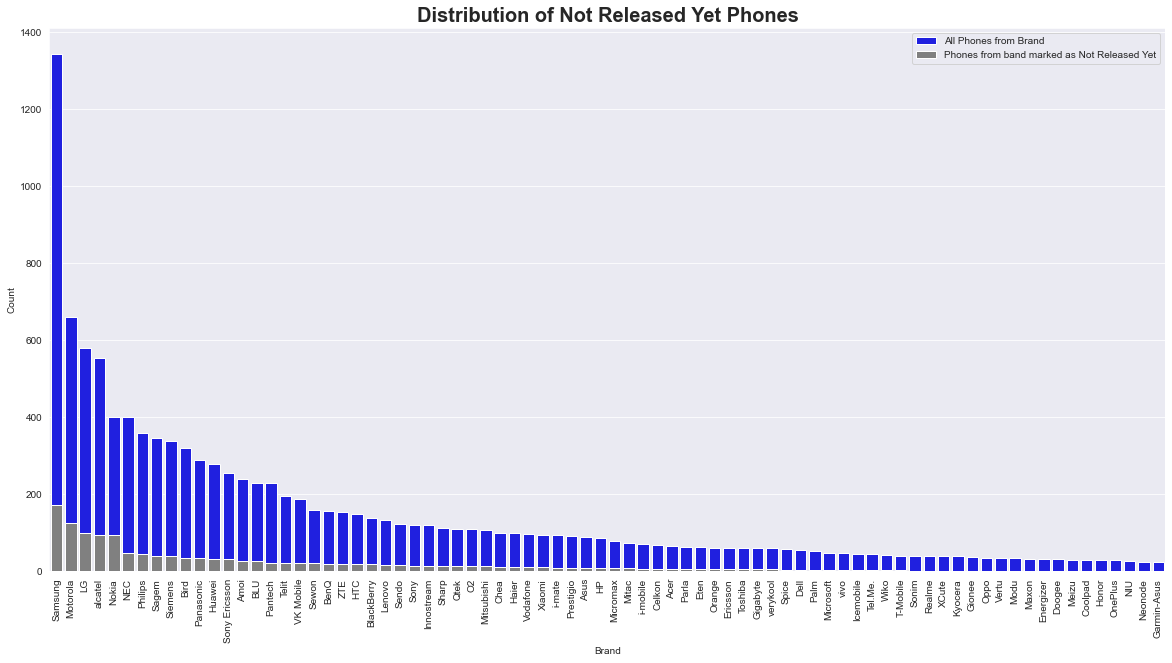

In [98]:
sns.set_style('darkgrid')

# Count the number of occurrences for each value in the 'Brand' column
brand_counts = cleaned_gsm_arena_data['Brand'].value_counts()
not_released_counts = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Released']=='Not Released Yet']['Brand'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=brand_counts.index, y=brand_counts.values, color='blue', label='All Phones from Brand')
sns.barplot(x=not_released_counts.index, y=not_released_counts.values, color='gray', label='Phones from band marked as Not Released Yet')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Not Released Yet Phones', fontsize=20, weight='bold')
plt.legend()

# Show the plot
plt.show()


In [99]:
df = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Released']!='Not Released Yet']
df['Release_Year'] = df['Released'].apply(lambda x: x.year)
# group data by 'Brand' and year, and count the number of phones released
phone_counts = df.groupby(['Brand', 'Release_Year']).size()
print(phone_counts)

Brand            Release_Year
AT&T             2006              1
                 2007              2
                 2008              1
Acer             2009             10
                 2010              8
                 2011              8
                 2012             12
                 2013             11
                 2014             18
                 2015             16
                 2016              9
                 2018              1
Allview          2011              1
                 2012              9
                 2013             21
                 2014             37
                 2015             23
                 2016             25
                 2017             14
                 2018             12
                 2019             11
                 2020              4
Amazon           2011              1
                 2012              3
                 2013              3
                 2014              4
        

C:\Users\alber\AppData\Local\Temp\ipykernel_7020\785385047.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
import plotly.express as px

# Get the phone counts by brand and release year
phone_counts = df.groupby(['Brand', 'Release_Year']).size().reset_index(name='count')

# Create the line plot
fig = px.line(phone_counts, x='Release_Year', y='count', color='Brand')

# Set the x-axis label
fig.update_xaxes(title_text='Release Year')

# Set the y-axis label
fig.update_yaxes(title_text='Count')

# Set the plot title
fig.update_layout(title='Number of Phones Released by Brand each Year between 1994 and 2022')



# Set the maximum value of the x-axis to 2022
fig.update_layout(xaxis=dict(range=[df['Release_Year'].min(), 2022]))

# Remove the legend
fig.update_layout(showlegend=False, height=600, width=1200)

# Show the plot
fig.show()


In [101]:
import ipywidgets as widgets
from ipywidgets import interact

# Get the phone counts by brand and release year
phone_counts = df.groupby(['Brand', 'Release_Year']).size().reset_index(name='count')

# Create a list of all the available brands
brands = phone_counts['Brand'].unique().tolist()

# Define a function to update the plot based on the selected brand
def update_plot(brands):
    # Filter the phone counts by the selected brands
    brand_counts = phone_counts[phone_counts['Brand'].isin(brands)]
    
    # Set the size of the figure
    plt.figure(figsize=(20,10))

    # Create the line plot
    sns.set_style('whitegrid')
    g = sns.lineplot(x='Release_Year', y='count', hue='Brand', data=brand_counts)

    # Set the x-axis label and ticks
    g.set(xlabel='Release Year')
    g.set(ylabel='Count')
    g.set(title=f'Number of Phones Released by {", ".join(brands)} each Year')
    g.set_xticks(range(2010, 2023))

    # Show the plot
    plt.show()

# Create the interactive widget
interact(update_plot, brands=widgets.SelectMultiple(options=brands, value=[brands[0]], description='Brand:'));


interactive(children=(SelectMultiple(description='Brand:', index=(0,), options=('AT&T', 'Acer', 'Allview', 'Am…

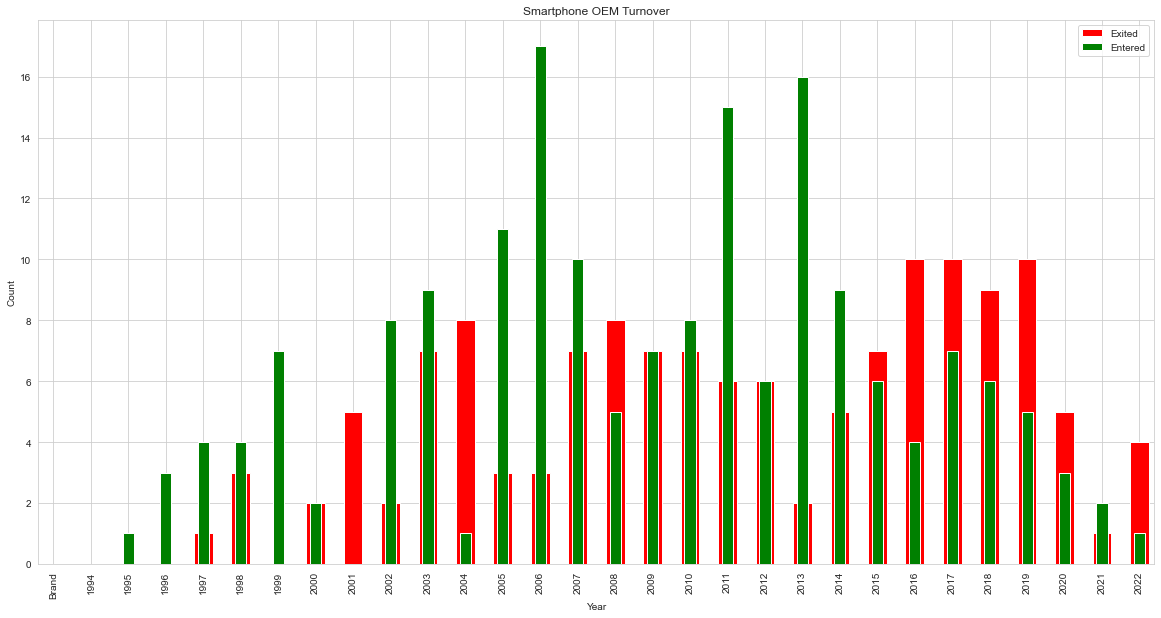

In [113]:
# Create a pivot table to count the number of models released by each OEM in each year
models_per_year = pd.pivot_table(df, values='Model', index='Brand', columns='Release_Year', aggfunc='count', fill_value=0)

# Reindex the pivot table to include all years from 1995 to 2022
all_years = pd.Index(range(1994, 2023), name='Year')
models_per_year = models_per_year.reindex(columns=all_years, fill_value=0)

# Reset the index to convert the pivot table into a DataFrame
models_per_year = models_per_year.reset_index()

# Create a new dataframe to record the changes
changes_df = models_per_year.copy()

# Iterate over each row starting from the second row
for i in range(0, len(models_per_year)):
    # Iterate over each year column starting from the second column
    for j in range(2, len(models_per_year.columns)):
        if j == 0:
            continue

        prev_value = int(models_per_year.iloc[i, j-1])
        curr_value = int(models_per_year.iloc[i, j])

        # Check the conditions and label the changes accordingly
        if prev_value == 0 and curr_value > 0:
            changes_df.iloc[i, j] = "entered"
        elif prev_value == 0 and curr_value == 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value > 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value == 0:
            changes_df.iloc[i, j] = "exited"

# Compute the counts of entered and exited OEMs
entered_counts = changes_df[changes_df == "entered"].count()
exited_counts = changes_df[changes_df == "exited"].count()

# Create a bar plot
fig, ax = plt.subplots(figsize=(20, 10))
exited_counts.plot(kind="bar", color="red", label="Exited", ax=ax)
entered_counts.plot(kind="bar", color="green", label="Entered", ax=ax, width=0.3)

# Set the plot title and axis labels
plt.title("Smartphone OEM Turnover")
plt.xlabel("Year")
plt.ylabel("Count")

# Add a legend
plt.legend()

# Display the plot
plt.show()

***** Build *****

In [103]:
cleaned_gsm_arena_data[cleaned_gsm_arena_data['Thickness']!= 'Not Measured']['Thickness'].sort_values()

11080     0.0
6943      0.0
11081     0.0
7945      4.7
5079      4.9
5092      4.9
889       5.1
10364     5.1
4356      5.1
10341     5.1
1104      5.1
1105      5.1
9538      5.2
1762      5.2
1761      5.2
4337      5.2
6502      5.2
11333     5.2
3968      5.5
9546      5.5
11344     5.5
170       5.5
10325     5.5
3822      5.5
8043      5.6
11328     5.6
9532      5.6
3697      5.6
3698      5.6
1778      5.6
1777      5.6
1758      5.6
1760      5.6
4310      5.6
1765      5.6
1757      5.6
3845      5.7
3871      5.7
3902      5.7
3967      5.7
8033      5.8
3696      5.9
4350      5.9
11160     5.9
8939      5.9
2923      5.9
11161     5.9
3695      5.9
11171     5.9
11206     5.9
11172     5.9
11184     5.9
6512      6.0
1099      6.0
3767      6.0
11163     6.1
2372      6.1
2373      6.1
6517      6.1
11122     6.1
11179     6.1
4961      6.1
11129     6.1
11134     6.1
9877      6.1
11195     6.1
11146     6.1
11162     6.1
8657      6.2
9878      6.2
1754      6.2
5087  

In [104]:
cleaned_gsm_arena_data.loc[7945]

Brand                                                Lenovo
Model                                        Yoga Tab 3 Pro
Highest_Network_Technology                              LTE
Announced                                           2015-12
Released                                            2015-12
Status                                            Available
Length                                                246.9
Width                                                 179.1
Thickness                                               4.7
Weight                                                666.8
Front                                                      
Back                                                       
Frame                                                      
Number_of_SIMs                                            1
Type_of_SIM                                       Micro-SIM
Display_Type                                            LCD
Display_Brightness                      

In [105]:
cleaned_gsm_arena_data[cleaned_gsm_arena_data['Thickness']!= 'Not Measured']['Thickness'].sort_values(ascending=False)

4022     75.0
2755     50.0
4061     47.0
4060     46.0
4062     46.0
10750    44.0
5419     38.0
9702     36.0
2288     32.0
9725     32.0
9705     32.0
6683     30.0
2562     29.0
2102     29.0
6096     29.0
6047     28.0
9733     28.0
9731     28.0
1727     28.0
9711     28.0
6668     28.0
2449     28.0
6663     28.0
2461     28.0
6107     28.0
6664     28.0
4914     28.0
2105     28.0
2566     28.0
6667     28.0
11232    28.0
11233    28.0
11239    28.0
2752     27.5
2845     27.4
2843     27.4
2094     27.0
9720     27.0
10826    27.0
2715     27.0
6074     27.0
2546     27.0
6148     27.0
2547     27.0
1724     27.0
2448     27.0
6081     27.0
6097     27.0
6094     27.0
4913     27.0
2556     27.0
6082     27.0
5429     27.0
5446     27.0
2844     26.6
2806     26.5
7182     26.5
2637     26.5
2790     26.5
2730     26.4
11235    26.3
4003     26.0
2552     26.0
11234    26.0
2551     26.0
2557     26.0
2145     26.0
2500     26.0
2778     26.0
6095     26.0
8308     26.0
6015  

In [106]:
cleaned_gsm_arena_data.loc[4022]

Brand                                             Sagem
Model                                           MY 3078
Highest_Network_Technology                          GSM
Announced                                       2002-01
Released                                        2002-01
Status                                     Discontinued
Length                                             23.0
Width                                              45.0
Thickness                                          75.0
Weight                                             85.0
Front                                                  
Back                                                   
Frame                                                  
Number_of_SIMs                                        1
Type_of_SIM                                    Mini-SIM
Display_Type                                 Monochrome
Display_Brightness                        Not Specified
Display_HDR_Capability                          

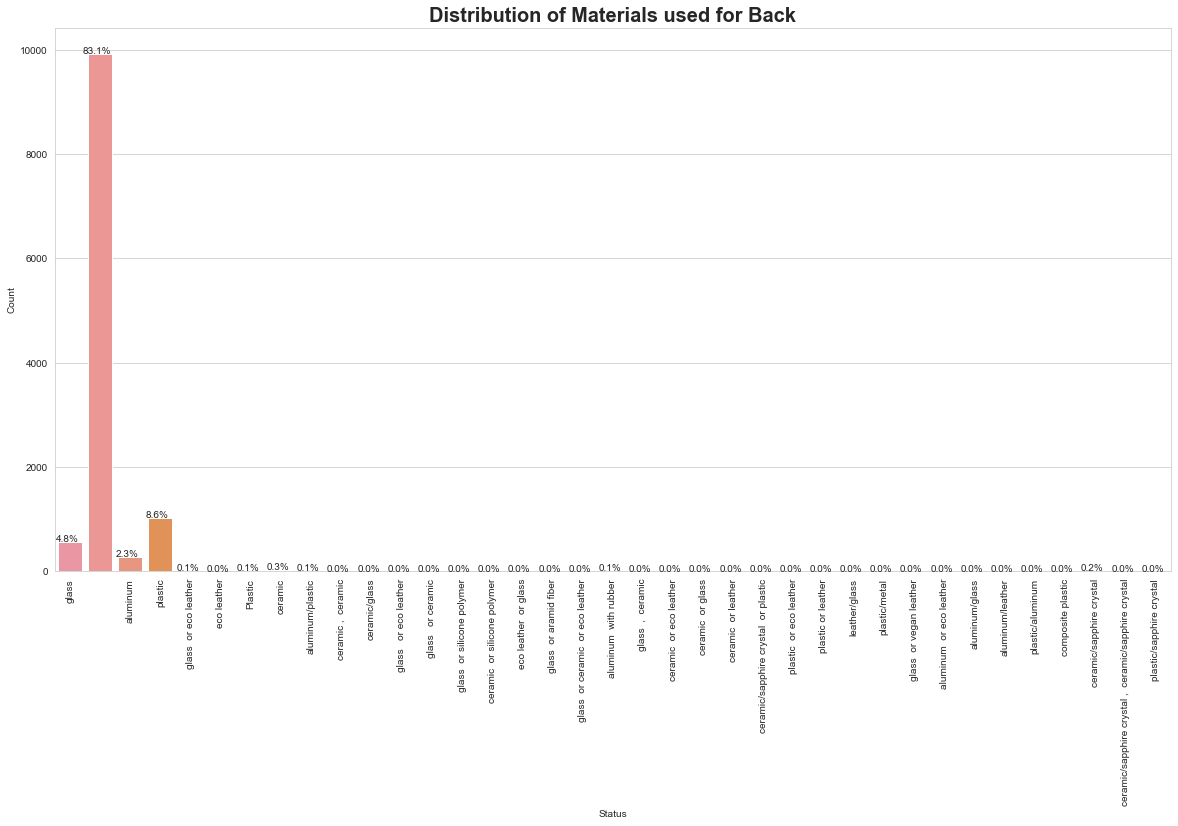

In [107]:
# Create a countplot using seaborn
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Back', data=cleaned_gsm_arena_data)

# Add labels to the plot
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Materials used for Back', fontsize=20, weight='bold')

plt.xticks(rotation=90)

# Add percentages to the plot
total = float(len(cleaned_gsm_arena_data['Back']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center', fontsize=10)

# Show the plot
plt.show()

In [108]:
cleaned_gsm_arena_data['Frame'].value_counts()

                                                       9922
plastic                                                1004
aluminum                                                884
stainless steel                                          59
Plastic                                                  17
stainless steel 316L                                     12
titanium                                                  8
ceramic                                                   7
stainless steel  316L                                     5
stainless steel  316L or titanium                         2
18-karat yellow/rose gold                                 2
magnesium alloy                                           2
aluminum/plastic                                          2
aluminum \nGlass front ,  ceramic                         1
titanium alloy                                            1
stainless steel  or aluminum                              1
zinc                                    

In [109]:
cleaned_gsm_arena_data['Screen_To_Body_Ratio_(%)'].value_counts()

Not Measured    1767
84.2              56
81.6              53
66.7              53
66.2              49
66.0              48
65.8              46
71.7              45
84.5              44
67.7              44
84.9              42
82.9              42
83.6              41
71.4              41
65.1              40
67.6              40
67.9              39
83.4              39
84.4              38
84.8              38
83.9              37
65.3              36
67.1              36
81.8              36
66.9              35
83.7              35
82.5              34
68.3              34
68.4              34
70.8              34
71.0              34
81.7              34
62.2              34
63.1              33
70.9              33
65.0              33
66.5              33
70.3              33
72.7              33
83.5              32
70.6              32
68.1              32
72.2              32
65.9              32
82.2              32
61.7              32
84.7              32
68.9         

In [110]:
cleaned_gsm_arena_data[cleaned_gsm_arena_data['Screen_To_Body_Ratio_(%)']!= 'Not Measured']['Screen_To_Body_Ratio_(%)'].sort_values(ascending=False)

666      180.8
6726     152.6
6725     144.2
1871     110.6
309      102.0
10624    100.2
6557      95.9
6558      95.8
9384      94.9
9385      94.9
9386      94.9
8835      94.1
8893      94.1
8834      94.1
8891      94.1
8892      94.1
8888      94.1
8911      94.1
8836      94.1
1226      93.6
1202      93.6
1201      93.6
1862      93.3
1863      93.3
9891      93.2
9401      93.1
9402      93.0
9404      93.0
340       92.9
327       92.9
7813      91.9
7812      91.9
7811      91.9
6635      91.8
8897      91.7
3906      91.7
3907      91.7
8903      91.7
8856      91.6
8857      91.6
778       91.5
820       91.5
9372      91.5
751       91.4
752       91.4
730       91.4
8943      91.3
1824      91.3
8944      91.3
9427      91.2
8915      91.2
9429      91.2
6636      91.2
8918      91.2
9414      91.1
8938      91.1
304       91.1
9371      91.1
9413      91.1
3853      91.0
3852      91.0
326       91.0
5169      90.9
3851      90.9
5168      90.9
9395      90.9
10573     

In [111]:
cleaned_gsm_arena_data.loc[309]

Brand                                               ZTE
Model                                    Blade V30 Vita
Highest_Network_Technology                          LTE
Announced                                       2021-07
Released                                        2021-08
Status                                        Available
Length                                            173.0
Width                                              78.1
Thickness                                           8.9
Weight                                            210.0
Front                                                  
Back                                                   
Frame                                                  
Number_of_SIMs                                        2
Type_of_SIM                                 Unspecified
Display_Type                                        LCD
Display_Brightness                        Not Specified
Display_HDR_Capability                          

In [112]:
#cleaned_gsm_arena_data[(cleaned_gsm_arena_data['Screen_To_Body_Ratio_(%)'] != 'Not Measured') & (cleaned_gsm_arena_data['Screen_To_Body_Ratio_(%)'] <= 100)]['Screen_To_Body_Ratio_(%)'].sort_values(ascending=False)